In [1]:
import pandas as pd

sales_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/236dfa1d124bf01147dd5b3da595066fcf84a1a4/grocery_sales.csv")


In [2]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [36]:
## Now we'll do some PCA analysis on the pokemon dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pokemon = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/9b0682ecacc5a3429f62947794d1adbeecbd5a11/pokemon.csv")
poke_df = pokemon.drop(['Name', 'Type 1', 'Type 2', 'Legendary', 'Total'], axis = 1)



In [23]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'#': 0.2, 'HP': 0.38, 'Attack': 0.43, 'Defense': 0.36, 'Sp. Atk': 0.44, 'Sp. Def': 0.43, 'Speed': 0.31, 'Generation': 0.16}
PC 2 effects = {'#': -0.67, 'HP': 0.07, 'Attack': 0.09, 'Defense': 0.06, 'Sp. Atk': 0.13, 'Sp. Def': 0.11, 'Speed': 0.16, 'Generation': -0.69}


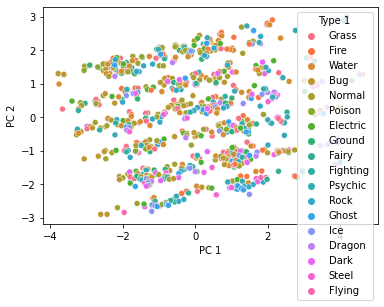

In [37]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

poke_cat_df = pokemon.loc[:, ['Type 1', 'Legendary']]

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()